In [1]:
from Perceptron import Perceptron
import numpy as np
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' 
	'iris/iris.data', header=None)

df.tail()#インポートできているかのチェック

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
import matplotlib.pyplot as plt
#100業目まで使うのでそこまでのラベルを抽出
y=df.iloc[0:100,4].values
##2つのラベルを-1,1に変換
y=np.where(y== 'Iris-setosa', -1, 1)
#データは1,3列目だけ抽出
X=df.iloc[0:100, [0, 2]].values
#setosaをプロット
plt.scatter(X[:50,0], X[:50,1], color="red", marker="o" ,label = "setosa")
plt.scatter(X[50:100,0], X[50:100,1], color="blue", marker="x" ,label = "versicolor")
plt.xlabel('sepal length[cm]')
plt.ylabel("petal length[cm]")
# 凡例の設定
plt.legend(loc="upper left")
plt.show()

<Figure size 640x480 with 1 Axes>

# 十分分けれそう

In [3]:
#パーセプトロンの生成
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

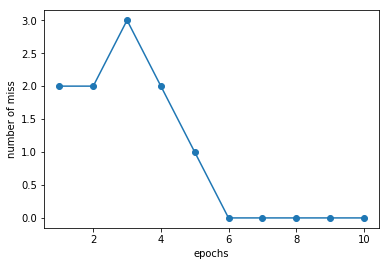

In [4]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("epochs")
plt.ylabel("number of miss")
plt.show()

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


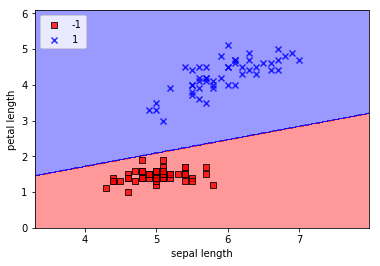

In [6]:
#境界のプロット
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

In [7]:
#from Adaline import AdalineGD,AdalineSGD
from Adaline import AdalineGD

Text(0.5, 1.0, 'Adaline - eta0.0001')

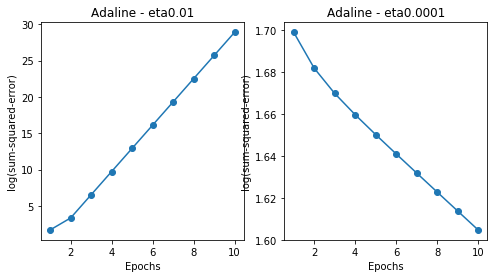

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
adal = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(adal.cost_)+1), np.log10(adal.cost_), marker='o')

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(sum-squared-error)")
ax[0].set_title("Adaline - eta0.01")

adall = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(adall.cost_)+1), np.log10(adall.cost_), marker='o')

ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(sum-squared-error)")
ax[1].set_title("Adaline - eta0.0001")

# スケーリング手法の標準化について学ぶ

In [9]:
X_std=np.copy(X)
X_std[:,0] = (X[:, 0] - X[:, 0].mean())/ X[:, 0].std()
X_std[:,1] = (X[:, 1] - X[:, 1].mean())/ X[:, 1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


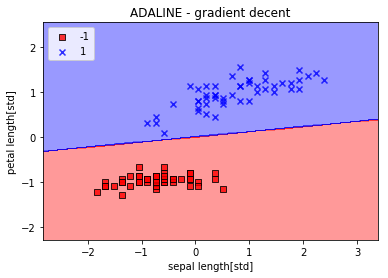

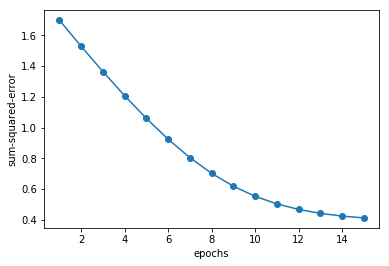

In [10]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title("ADALINE - gradient decent")
plt.xlabel("sepal length[std]")
plt.ylabel("petal length[std]")
plt.legend(loc="upper left")
plt.show()
plt.plot(range(1,len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel("epochs")
plt.ylabel("sum-squared-error")
plt.show()

# 次は確率的勾配効果法を使ってみる

In [11]:
from Adaline import AdalineSGD

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


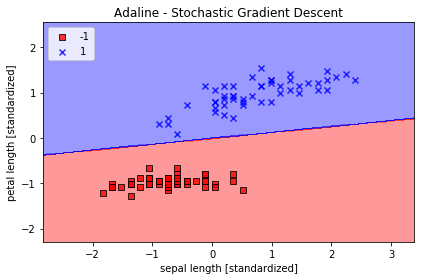

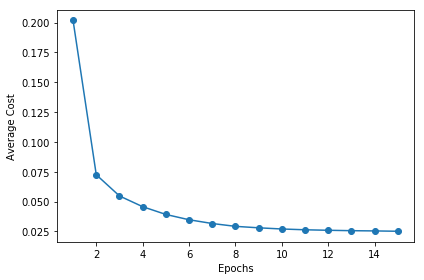

In [12]:

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()


# GDよりSGDのが下がり方が早いことが分かる